In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2


# Measures

## NLPD

## Error

## cobeau
 
## coverage ?

## distance from 'optimally informed Tsomething' (DOIT)


# experiment

## setup



### toy problem
parameters were obtained via non-exhaustive gridsearch, since the performance on the error is not the most important metric, the other metrics were not optimized for.

#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)
  
#### comparisson models:

##### optimal model

##### mean/std model

### kaggle problem


#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)

In [3]:
showcase_code('measures.py',showcase=True)

# Toy Problem

In [4]:
from data_loaders import get_X_y, generate_y
from measures import compute_cobeau, compute_nlpd, compute_error

from helpers import plot_uncertainty

In [6]:
toy = True

num_epochs = 300
if toy:
    num_epochs = 2000

num_experiments = 3


In [8]:
from nn_models.models import SaverModel, BobstrapEnsemble, DropoutModel
from nn_models.base_ensemble import VanillaEnsemble
from nn_models.ensembles import BootstrapEnsemble, ShuffleEnsemble

# Done toy BootstrapEnsemble, BobstrapEnsemble, SaverModel, ShuffleEnsemble, DropoutModel
# todo toy   VanillaEnsemble,

iters = 100
l2 = 1
n_std = 4

In [9]:
from experimentation import Experimentator

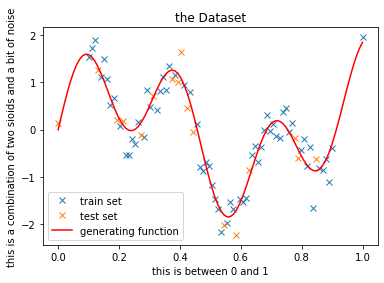

In [10]:
exp = Experimentator(num_experiments,num_epochs,BobstrapEnsemble,toy,seed=seed,generator_function = generate_y)

pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.2130777835845947 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.4180383682250977 
pre-training information not available for methods that rely on ensembling through time
the training for 2000 took 2.3860228061676025 


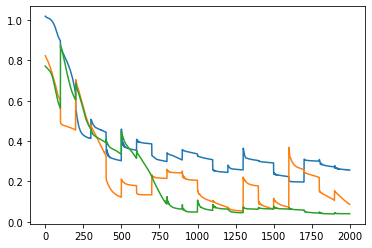

In [11]:
exp.run_experiment()

# store experiment

In [15]:
import pickle

save_file = f"pickles\\{exp.model_name}_toy_{toy}_{num_experiments}.pkl"

with open(save_file, "wb") as f:
    pickle.dump(exp, f)
    
with  open(save_file, "rb") as f:
    exp2 = pickle.load(f)

# analyze experiment

In [22]:
from experimentation import ExperimentAnalyzer

In [23]:
analyzer = ExperimentAnalyzer(exp)

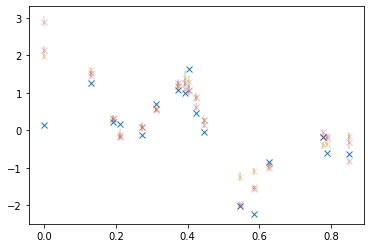

In [24]:
analyzer.plot_outcomes()

In [25]:
analyzer.analysis()

0.3996172615799444 0.0381383857944265
0.17764949819829867 0.12226167271156486
0.5378214753019843 0.28629576101691584
-0.426910766929121 0.204804238870939


0.3996172615799444 0.0381383857944265
0.17764949819829867 0.12226167271156486
0.5378214753019843 0.28629576101691584
-0.426910766929121 0.204804238870939
no comparisson possible for error
'ExperimentAnalyzer' object has no attribute 'generator_function'


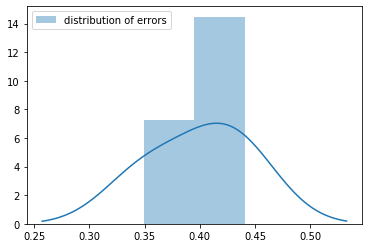

no comparisson possible for nlpd
'ExperimentAnalyzer' object has no attribute 'original_function_nlpd'


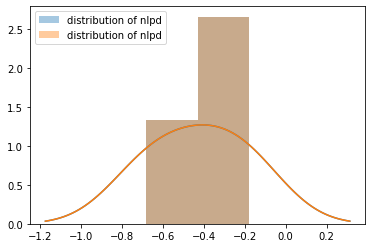

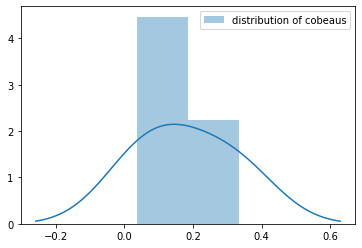

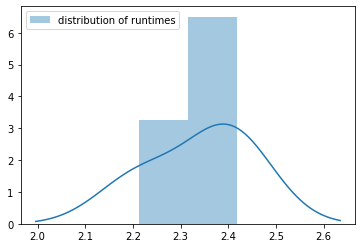

In [26]:
analyzer.plot_distribution_of_metrics()

1 0
 this many models: (100, 10)
cobeau: (0.16257562147559051, 0.5330030071432935)
nlpd: -0.6815375434482898.
 nlpds of just mean and just std of the model:
0.5377464136941734


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:15: RuntimeWarning: invalid value encountered in log
  nlpd = 1/2 * ((y-y_pred)**2 / y_std) + np.log(y_std)


nan
error: 0.3490479739899824
 this many models: (100, 10)
cobeau: (0.036017208493820924, 0.890845142823302)
nlpd: -0.4191426332756896.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.44114582950025777


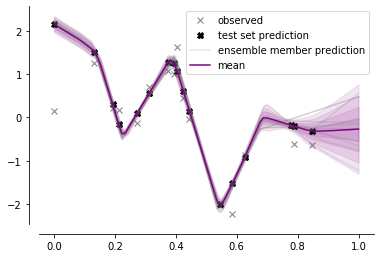

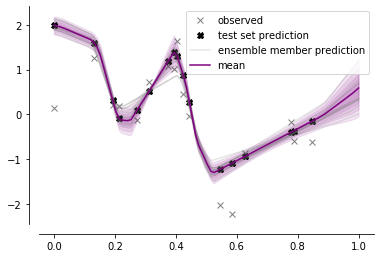

In [27]:
analyzer.plot_models()

0 2
 this many models: (100, 10)
cobeau: (0.036017208493820924, 0.890845142823302)
nlpd: -0.4191426332756896.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.44114582950025777
 this many models: (100, 10)
cobeau: (0.3343556646254846, 0.18961627593935734)
nlpd: -0.18005212406338375.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.408657981249593


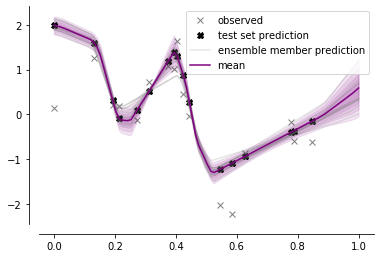

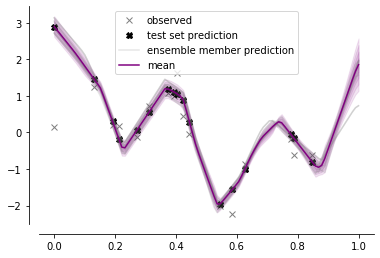

In [28]:
analyzer.plot_models('cobeau')

1 2
 this many models: (100, 10)
cobeau: (0.16257562147559051, 0.5330030071432935)
nlpd: -0.6815375434482898.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.3490479739899824
 this many models: (100, 10)
cobeau: (0.3343556646254846, 0.18961627593935734)
nlpd: -0.18005212406338375.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.408657981249593


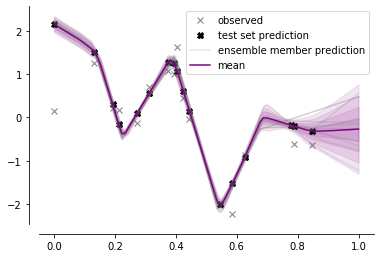

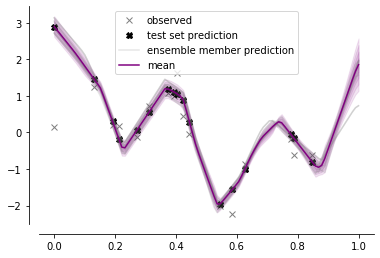

In [29]:
analyzer.plot_models('nlpd')

In [31]:
len(exp.stats_dict['analysis']['cobeau'])

3

In [32]:
len(exp.stats_dict['models'])

3

In [33]:
np.argmin(exp.stats_dict['analysis']['cobeau'])

0

In [34]:
# exp.stats_dict['analysis']['cobeau']

In [35]:
np.argmax([1,2,3])

2

In [36]:
exp2.plot_models('nlpd')

AttributeError: 'Experimentator' object has no attribute 'plot_models'

# data analysis



In [37]:
test_string = "<class 'nn_models.models.SaverModel'>"

In [26]:
index_start = test_string.find('.models.')+len('.models.')
index_stop = test_string.find("'>")
new_string = test_string[index_start:index_stop]

In [27]:
new_string = test_string[index_start:index_stop]

In [28]:
new_string

'SaverModel'

In [29]:
type(SaverModel)

type

In [30]:
f'{SaverModel}'

"<class 'nn_models.models.SaverModel'>"